In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()

In [45]:
burritos = pd.read_csv('burritos.csv')

In [46]:
burritos.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
burritos.shape

(423, 66)

Text(0.5, 1.0, 'show the missing value')

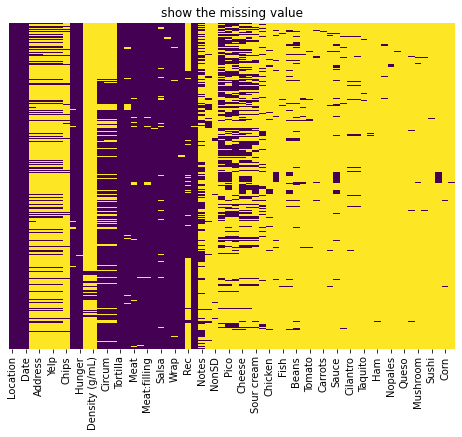

In [48]:
# heatmap to see where we are missing data
plt.figure(figsize=(8, 6))
sns.heatmap(burritos.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("show the missing value")

Text(0.5, 1.0, 'the missing value in each column')

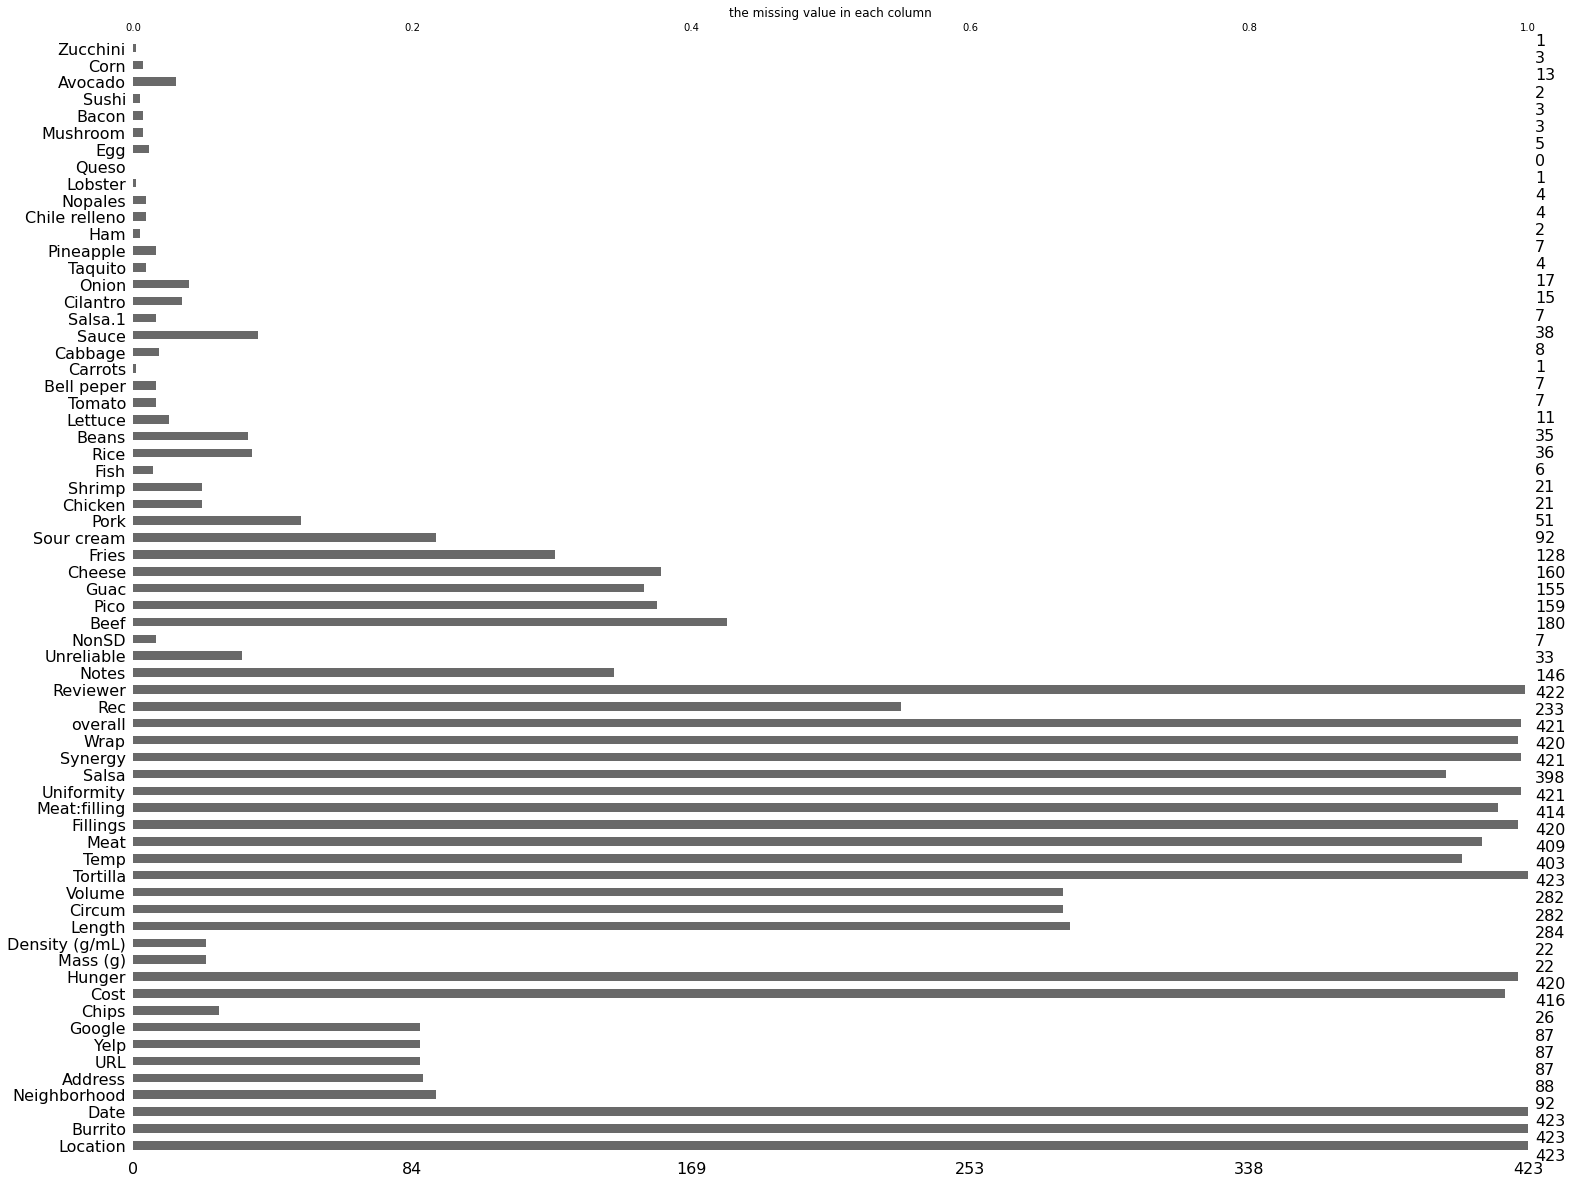

In [49]:
import missingno as msno
# bar chart to see where we are missing data
plt.figure(figsize=(8, 6))
msno.bar(burritos)
plt.title("the missing value in each column")

In [50]:
burritos.isnull()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,False,False,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
419,False,False,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
420,False,False,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
421,False,False,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True


In [51]:
missing = burritos.isnull().sum()
missing 

Location          0
Burrito           0
Date              0
Neighborhood    331
Address         335
               ... 
Bacon           420
Sushi           421
Avocado         410
Corn            420
Zucchini        422
Length: 66, dtype: int64

In [52]:
#Determine how many missing values are present in each column
missing_percent = burritos.isnull().mean()*100
missing_percent

Location         0.000000
Burrito          0.000000
Date             0.000000
Neighborhood    78.250591
Address         79.196217
                  ...    
Bacon           99.290780
Sushi           99.527187
Avocado         96.926714
Corn            99.290780
Zucchini        99.763593
Length: 66, dtype: float64

In [62]:
#Fill with mean
x= burritos['Google'].mean()
burritos['Google'].fillna(x, inplace= True)

In [63]:
burritos['Google']

0      4.200000
1      3.300000
2      4.167816
3      4.167816
4      3.800000
         ...   
418    4.167816
419    4.167816
420    4.167816
421    4.167816
422    4.167816
Name: Google, Length: 423, dtype: float64

In [64]:
burritos['Yelp'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Name: Google, Length: 423, dtype: bool

In [79]:
#Fill with median
y= burritos['Yelp'].median()
burritos['Yelp'].fillna(y, inplace= True)

In [80]:
burritos['Yelp']

0      3.500000
1      3.500000
2      3.887356
3      3.887356
4      4.000000
         ...   
418    3.887356
419    3.887356
420    3.887356
421    3.887356
422    3.887356
Name: Yelp, Length: 423, dtype: float64

In [81]:
burritos['Yelp'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Name: Yelp, Length: 423, dtype: bool

In [76]:
#Fill with mode
z= burritos['Cost'].mode()
burritos['Cost'].fillna(z, inplace= True)

In [77]:
burritos['Cost']

0      6.49
1      5.45
2      4.85
3      5.25
4      6.59
       ... 
418    6.00
419    6.00
420    7.90
421    7.90
422    5.50
Name: Cost, Length: 423, dtype: float64

In [78]:
burritos['Cost'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Name: Cost, Length: 423, dtype: bool

In [67]:
burritos['Google'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Name: Google, Length: 423, dtype: bool

In [60]:
#Fill with own data
burritos['Neighborhood'].fillna("Miramar", inplace=True)
burritos

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,Miramar,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,Miramar,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Valentine's Mexican Food,Al Pastor,8/27/2019,Miramar,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Valentine's Mexican Food,Chile Relleno,8/27/2019,Miramar,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,Valentine's Mexican Food,California,8/27/2019,Miramar,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Valentine's Mexican Food,Shrimp,8/27/2019,Miramar,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
burritos['Neighborhood'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Name: Neighborhood, Length: 423, dtype: bool

Text(0.5, 1.0, 'the missing value in each column')

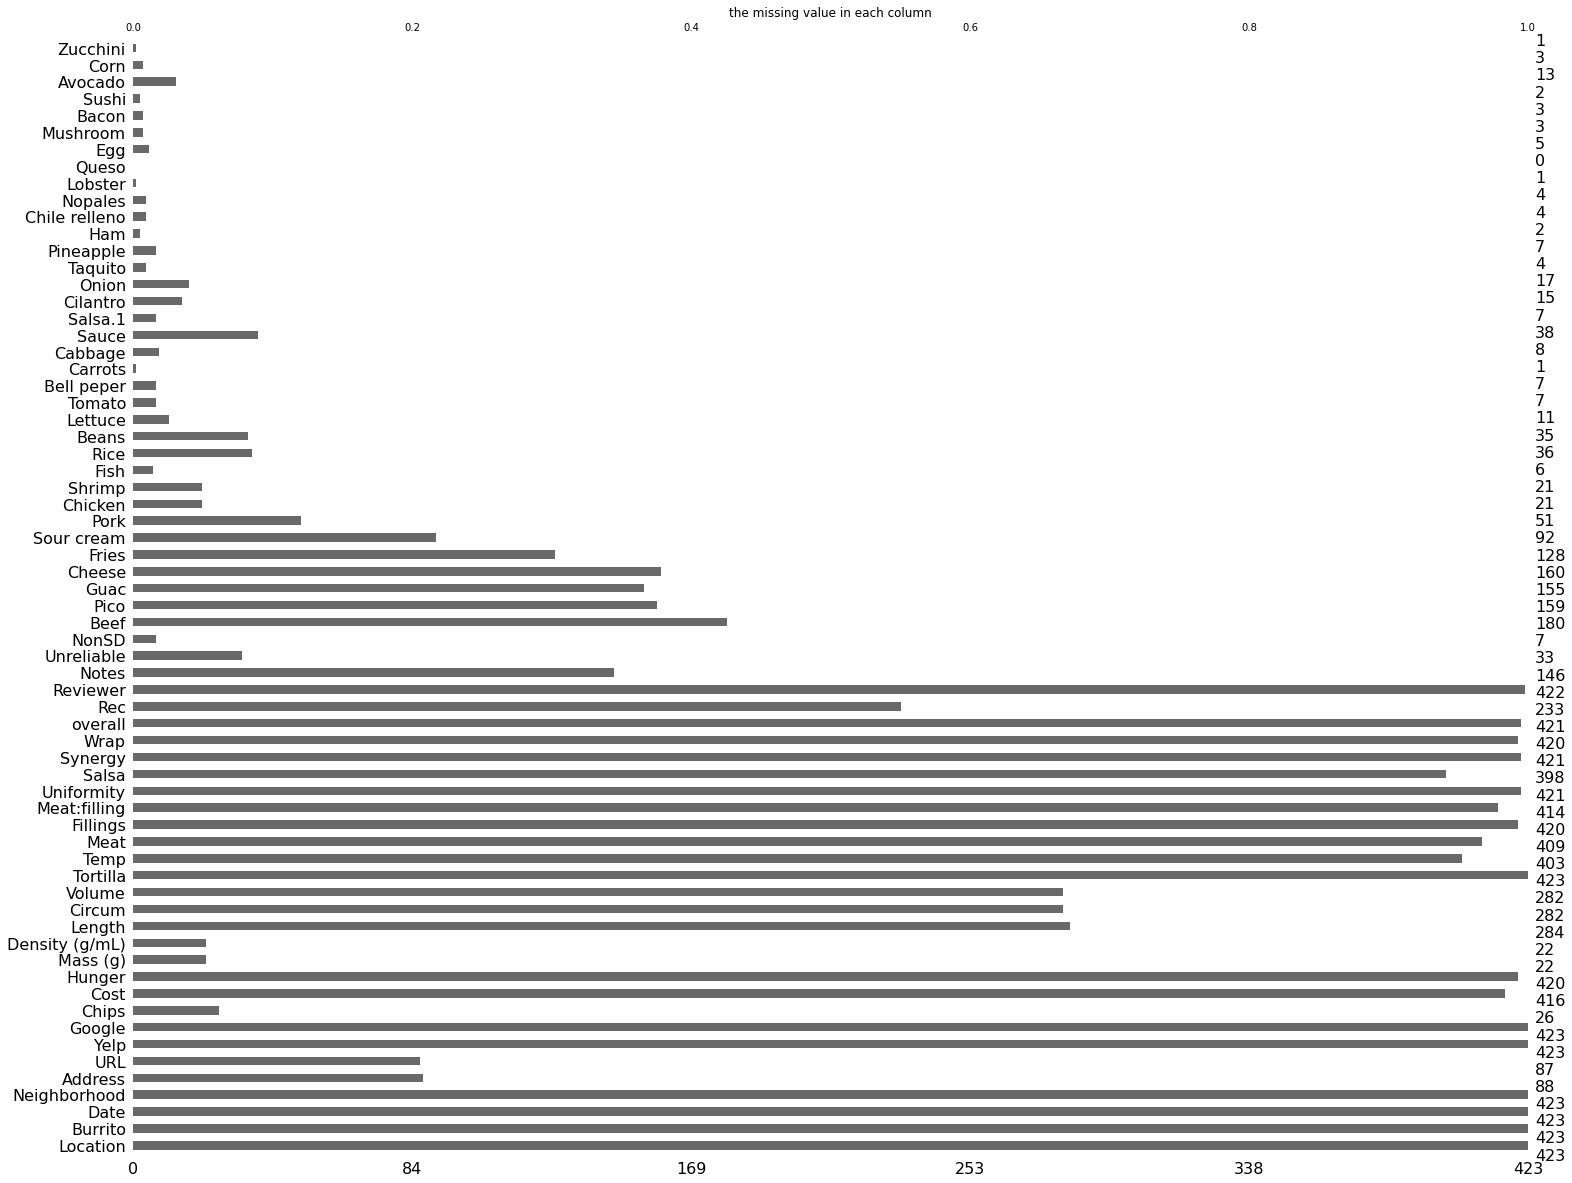

In [ ]:
# bar chart to see where we are missing data
plt.figure(figsize=(8, 6))
msno.bar(burritos)
plt.title("the missing value in each column")

In [93]:
#Fill Forward
burritos['Beef']= burritos['Beef'].fillna(method='ffill')
burritos['Beef']

0      x
1      x
2      x
3      x
4      x
      ..
418    x
419    x
420    x
421    x
422    x
Name: Beef, Length: 423, dtype: object

In [95]:
burritos['Beef'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Name: Beef, Length: 423, dtype: bool

In [86]:
#Fill Backward
burritos['Volume']= burritos['Volume'].fillna(method='bfill')
burritos['Volume']

0      0.77
1      0.77
2      0.77
3      0.77
4      0.77
       ... 
418    0.57
419    1.02
420    0.77
421    1.07
422    0.61
Name: Volume, Length: 423, dtype: float64

In [87]:
burritos['Volume'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
418    False
419    False
420    False
421    False
422    False
Name: Volume, Length: 423, dtype: bool

Text(0.5, 1.0, 'the missing value in each column')

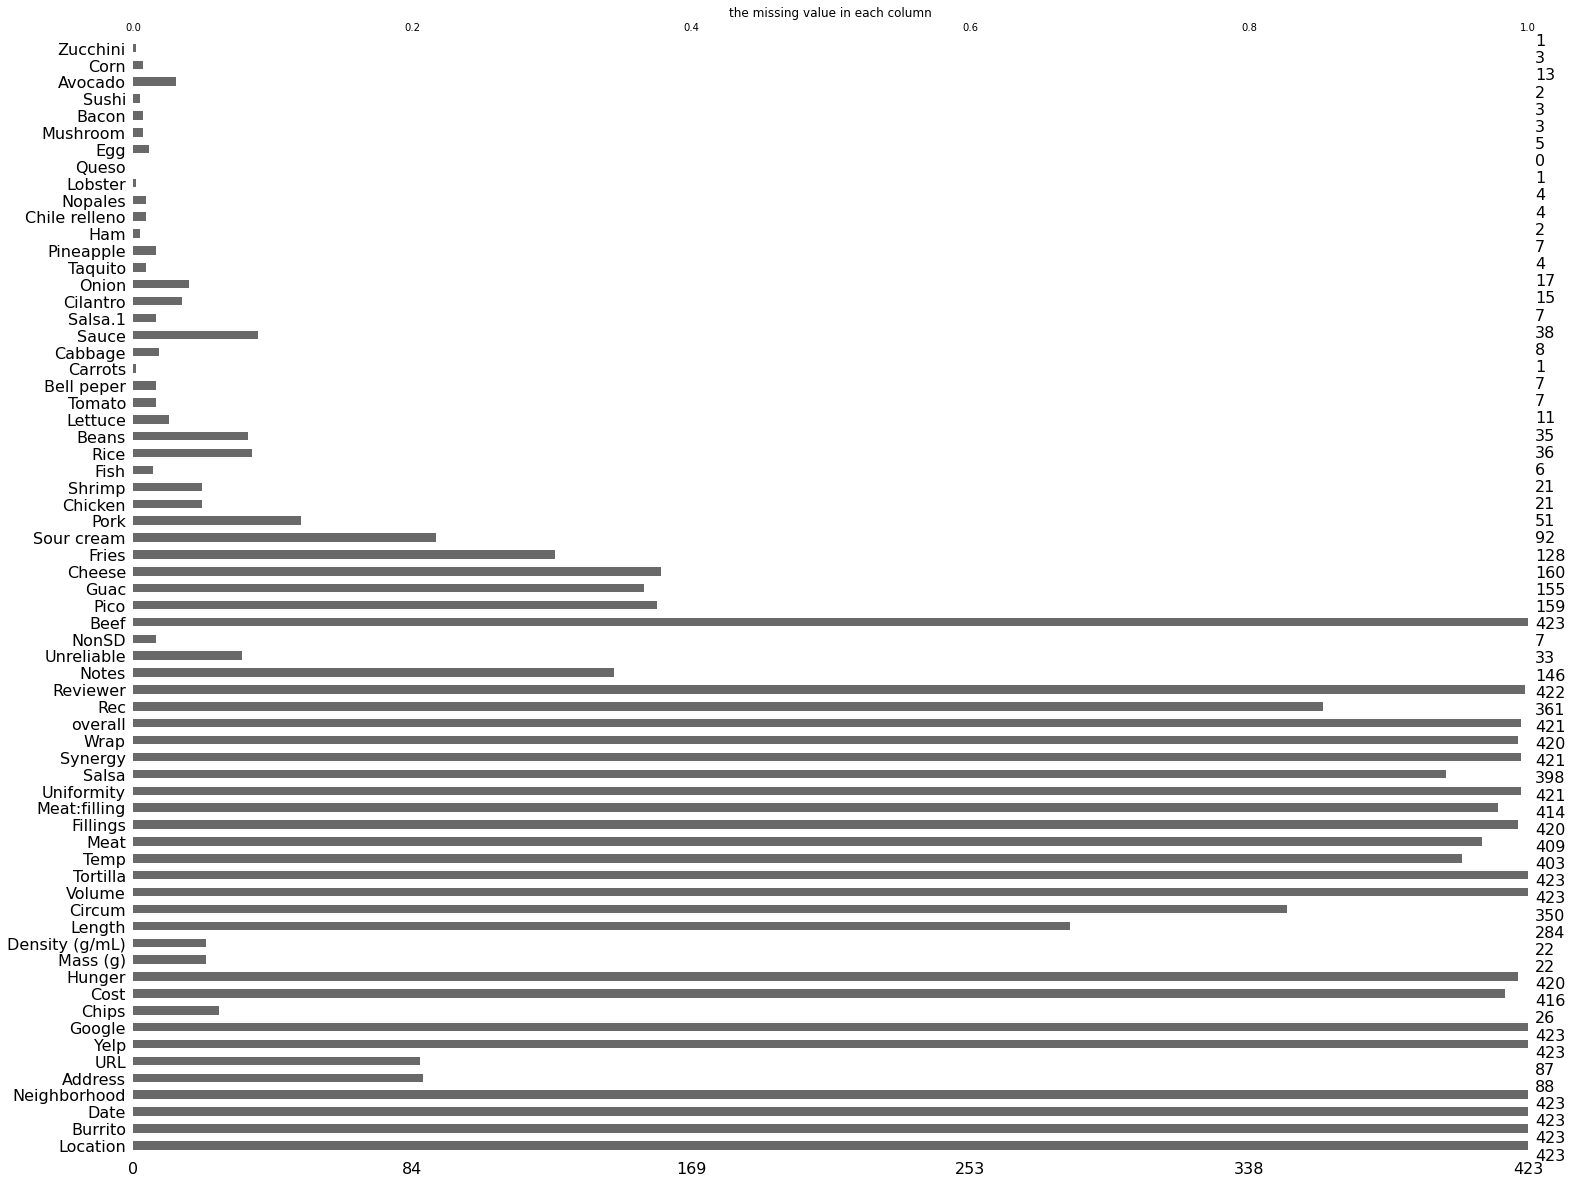

In [ ]:
# bar chart to see where we are missing data
plt.figure(figsize=(8, 6))
msno.bar(burritos)
plt.title("the missing value in each column")

Text(0.5, 1.0, 'show the missing value')

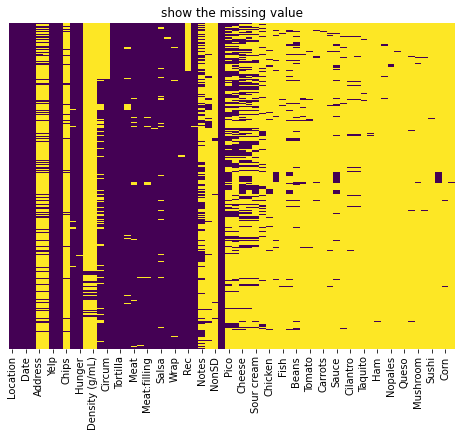

In [98]:
# heatmap to see where we are missing data
plt.figure(figsize=(8, 6))
sns.heatmap(burritos.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("show the missing value")